In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("img_src.jpg", 3)

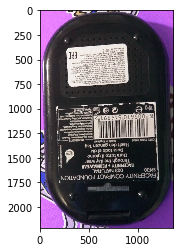

In [23]:
plt.imshow(img)

In [49]:
img_resized = cv2.resize(img,(50,50))

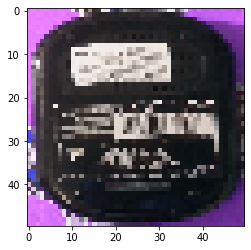

In [50]:
plt.imshow(img_resized)

In [89]:
marker = np.zeros_like(img_resized[:,:,0
                                  ]).astype(np.int32)

In [90]:
marker[3][5] = 1
marker[4][45] = 1
marker[45][5] = 1
marker[45][45] = 1
marker[45][10] = 1

marker[20][2] = 1
marker[30][2] = 1
marker[40][2] = 1

marker[20][49] = 1
marker[30][49] = 1
marker[40][49] = 1

marker[46][46] = 1
marker[44][43] = 1
marker[43][46] = 1

marker[35][2] = 1
marker[37][2] = 1

marker[39][2] = 1
marker[40][2] = 1

marker[11][2] = 1
marker[12][2] = 1

marker[15][2] = 1

marker[17][2] = 1
marker[18][2] = 1

marker[19][2] = 1

In [91]:
marker[10][10] = 62  
marker[20][20] = 62 # car body
marker[30][30] = 62   # rooftop
marker[40][40] = 62     # rear light


marker[10][40] = 62  
marker[20][30] = 62 # car body
marker[30][20] = 62   # rooftop
marker[40][10] = 62     # rear light





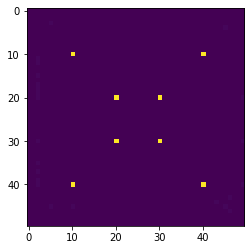

In [92]:
plt.imshow(marker)

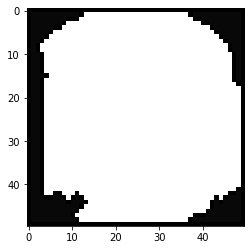

In [93]:
marked = cv2.watershed(img_resized, marker)

# Plot this one. If it does what we want, proceed;
# otherwise edit your markers and repeat
plt.imshow(marked, cmap='gray')
plt.show()


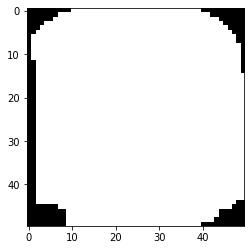

In [94]:
# Make the background black, and what we want to keep white
marked[marked == 1] = 0
marked[marked > 1] = 255

# Use a kernel to dilate the image, to not lose any detail on the outline
# I used a kernel of 3x3 pixels
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(marked.astype(np.float32), kernel, iterations = 1)

# Plot again to check whether the dilation is according to our needs
# If not, repeat by using a smaller/bigger kernel, or more/less iterations
plt.imshow(dilation, cmap='gray')
plt.show()



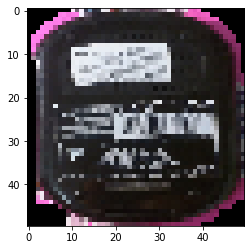

In [95]:
# Now apply the mask we created on the initial image
final_img = cv2.bitwise_and(img_resized, img_resized, mask=dilation.astype(np.uint8))

# cv2.imread reads the image as BGR, but matplotlib uses RGB
# BGR to RGB so we can plot the image with accurate colors
b, g, r = cv2.split(final_img)
final_img = cv2.merge([r, g, b])

# Plot the final result
plt.imshow(final_img)
plt.show()

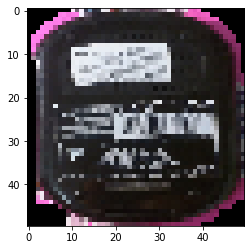

In [96]:
plt.imshow(final_img)
plt.show()

In [98]:
cv2.imwrite( "./img_cropped.jpg", final_img );